# NueralNetwork模型
  
  一个神经元通常具有多个树突，主要用来接受传入信息；而轴突只有一条，轴突尾端有许多轴突末梢可以给其他多个神经元传递信息：
  
  ![](./data/image/nn1.jpg '神经元')
  
  据此建立的神经元模型如下，其中$\sigma $函数被称为“激活函数”，实际起到“约束函数”的作用，通常是使用$g$来表示，这里目的是表明“激活函数”使用的是Sigmoid函数，其他常见的激活函数有“Relu”,"Tanh","Leaky Tanh"等等。
  
  ![](./data/image/nn2.jpg '神经元模型')
  
  这里用一个简单的2层网络来介绍后续使用的模型：
  
  ![](./data/image/nn3.jpg '简单神经网络')
  
  其中$L0$层为输入层，$L1$层为隐藏层，$L2$层为输出层，通常输入层不会计入层总数中，所以这是一个2层的神经网络。 $a^{[l]}_j$表示第$l$层的第$j$的神经元节点。
  
  其中还隐藏了一些参数:
  
  $a^{[l]} = g(z^{[l]}) = g(W^{[l]} a^{[l-1]} + b^{[l]})$
  
  $W^{[l]} = \{w_1^{[l]},...,w_n^{[l]}\}^T$
  
---
# 前向传播

  使用前述介绍提到的公式：
  
  $$a^{[l]} = g(z^{[l]}) = g(W^{[l]} a^{[l-1]} + b^{[l]})$$
  
  $$W^{[l]} = \{w_1^{[l]},...,w_n^{[l]}\}^T$$
  
  如此逐层计算得到输出即可。

---
# 后向传播

  后向传播指的就是求出$loss$函数对于各层各参数的梯度的过程，实际得到的就是各层各参数的变化对于最终结果的影响程度。
  
  $$loss(W^{[1]},b^{[1]},W^{[2]},b^{[2]}, ... ,W^{[L]},b^{[L]}) = \frac{1}{m}\sum_{i=1}^{m} (\widehat{y} - y)^2$$
  
  根据链式法则则可以得出：
  
  $$\frac{dloss}{dW^{[L]}} = \frac{dloss}{da^{[L]}}\frac{da^{[L]}}{dz^{[L]}}\frac{dz^{[L]}}{dW^{[L]}}$$
  
  由于后续的实例为一个分类问题，所以这里$\frac{dloss}{da^{[L]}}$为二分类问题的结果，不同问题下这个结果会有不同，设计框架时需要独立出来。
  
  $$\frac{dloss}{da^{[L]}} = \frac{1}{m}(-\frac{y}{a^{[L]}} - \frac{1-y}{1-a^{[L]}})$$
  
  $$\frac{dz^{[L]}}{dW^{[L]}} = a^{[L-1]T}$$
  
  $$\frac{dz^{[L]}}{db^{[L]}} = \sum_{i=1}^{m} z^{[L]}[:,i]$$
  
  所以我们只需要得出$loss^{'}(a^{[L]})$，然后使用$a^{'[l]}(W^{[l]}) = a^{'[l]}(z^{[l]})z^{'[l]}(W^{[l]}), a^{'[l]}(b^{[l]}) = a^{'[l]}(z^{[l]})z^{'[l]}(b^{[l]})$重复进行各层计算即可，注意各层间的关系$z^{'[l]}(a^{[l-1]})=W^{[l]T}$不要忘记加入链中。

In [1]:
import sys
import os

sys.path.append("%s/../.." % os.getcwd())

In [2]:
import numpy as np
import h5py
from collections import OrderedDict
from arsenal.data_process.load_data import DataLoader
from arsenal.data_process.plot_data import Ploter
from arsenal.optimizer.grad_descent import GradDescent
from arsenal.model.nn import NueralNetwork

%load_ext autoreload
%autoreload 2

In [3]:
def plot_data(X, y):
    ploter = Ploter()
    
    pos = [i for i in range(y.shape[0]) if (y == 1)[i] == True]
    neg = [i for i in range(y.shape[0]) if (y == 0)[i] == True]
    
    ploter.plot(X[pos,0], X[pos,1], 'ko', linewidth=2, markersize=7, markerfacecolor='r')
    ploter.plot(X[neg,0], X[neg,1], 'ko', linewidth=1, markersize=7, markerfacecolor='b')
    
    ploter.show()

In [4]:
map = OrderedDict([
    ("L0", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": None,
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 5}
    ),
    ("L1", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": "tanh",
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 4}
    ),
    ("L2", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": "sigmoid",
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 3}
    ),
])

nn = NueralNetwork(map)

nn.initialize_params(seed=3)

print("W1 = " + str(nn.map["L1"]["W"]))
print("b1 = " + str(nn.map["L1"]["b"]))
print("W2 = " + str(nn.map["L2"]["W"]))
print("b2 = " + str(nn.map["L2"]["b"]))

W1 = [[ 0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.59252326 -0.10282495  0.74307418  0.11835813]
 [-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]]
b2 = [[ 0.]
 [ 0.]
 [ 0.]]


In [5]:
map = OrderedDict([
    ("L0", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": None,
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 4}
    ),
    ("L1", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": "relu",
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 4}
    ),
    ("L2", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": "relu",
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 3}
    ),
    ("L3", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": "sigmoid",
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 1}
    ),
])

test_X = np.array(([[-0.31178367,0.72900392,0.21782079,-0.8990918],
 [-2.48678065,  0.91325152,  1.12706373, -1.51409323],
 [ 1.63929108, -0.4298936,   2.63128056,  0.60182225],
 [-0.33588161,  1.23773784,  0.11112817,  0.12915125],
 [ 0.07612761, -0.15512816,  0.63422534,  0.810655  ]]))
map['L1']['W'] = np.array(([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
       [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
       [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
       [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]))
map['L1']['b'] = np.array(([[ 1.38503523],
       [-0.51962709],
       [-0.78015214],
       [ 0.95560959]]))
map['L2']['W'] = np.array(([[-0.12673638, -1.36861282,  1.21848065, -0.85750144],
       [-0.56147088, -1.0335199 ,  0.35877096,  1.07368134],
       [-0.37550472,  0.39636757, -0.47144628,  2.33660781]]))
map['L2']['b'] = np.array(([[ 1.50278553],
       [-0.59545972],
       [ 0.52834106]]))
map['L3']['W'] = np.array(([[ 0.9398248 ,  0.42628539, -0.75815703]]))
map['L3']['b'] = np.array(([[-0.16236698]]))

nn = NueralNetwork(map)

#print(nn.map['L1']['W'].shape, nn.map['L1']['b'].shape, nn.map['L2']['W'].shape, nn.map['L2']['b'].shape)
nn.forward_propagation(test_X)
    
# print(np.mean(nn.map['L1']['z']) ,np.mean(nn.map['L1']['a']),np.mean(nn.map['L2']['z']),np.mean(nn.map['L2']['a']))
# print('Expected: ',0.262818639215,0.0919990450506,-1.30766601295,0.212877681706, '\n')

print("AL = " + str(nn.map['L3']['a']))

AL = [[ 0.03921668  0.70498921  0.19734387  0.04728177]]


In [6]:
# test_Y = np.array(([1,0,0]))
# test_Y = test_Y.reshape(1, test_Y.shape[0])

# map['L2']['a'] = np.array(([[0.5002307,0.49985831,0.50023963]]))

Y = np.array(([[1, 1, 1]]))
Y_hat = np.array(([[.8,.9,0.4]]))
    
print('Loss: ', nn.loss(Y_hat, Y))
print('Expected: ',0.414931599615, '\n')

Loss:  0.414931599615
Expected:  0.414931599615 



In [7]:
map = OrderedDict([
    ("L0", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": None,
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 4}
    ),
    ("L1", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": "relu",
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 4}
    ),
    ("L2", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": "relu",
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 3}
    ),
    ("L3", {
        "W": None,
        "b": None,
        "z": None,
        "a": None,
        "activation": "sigmoid",
        "dz": None,
        "dW": None,
        "db": None,
        "n_neuron": 1}
    ),
])

In [8]:
def load_data():
    train_dataset = h5py.File('./data/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('./data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

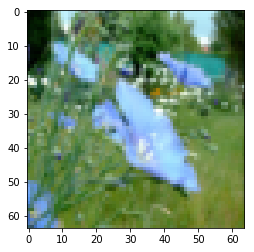

y = 0. It's a non-cat picture.


In [9]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

import matplotlib.pyplot as plt

index = 20
plt.imshow(train_x_orig[index])
plt.show()
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")# Explore your dataset 

In [10]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [11]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [12]:
def nn_model(X, Y, map, test_X, test_Y, iterations=50000, learning_rate=0.1):
    m = X.shape[1]
    step = 100
    losses = []
    
    nn = NueralNetwork(map)
    
    nn.initialize_params()
    
    for i in range(iterations):
        
        aL = nn.forward_propagation(X)

        da = -(Y/aL + (Y-1)/(1-aL))/m
        nn.backward_propagation(da)
        nn.update_params(rate=learning_rate)
        
        if i % step == 0:
            loss = nn.loss(nn.map['L'+str(nn.L)]['a'], Y)
            losses.append(loss)
            print('Loss ',i, " ", loss)
    
    index = np.arange(0,iterations, step).reshape(iterations//step, 1)
    losses = np.array((losses)).reshape(len(losses),1)
    ploter = Ploter()
    ploter.plot(index, np.array((losses)), 'r-')
    ploter.show()
    
    predict_train = nn.predict(X)
    print("Train Accuracy: ", np.mean(predict_train == Y))
    
    predict_test = nn.predict(test_X)
    print("Test Accuracy: ", np.mean(predict_test == test_Y))

Loss  0   0.69504649618
Loss  100   0.589259605458
Loss  200   0.523260917362
Loss  300   0.449768639622
Loss  400   0.420900216188
Loss  500   0.372464030617
Loss  600   0.347420518702
Loss  700   0.317191919874
Loss  800   0.266437743477
Loss  900   0.219914328078
Loss  1000   0.143578988936
Loss  1100   0.453092126232
Loss  1200   0.0949935767009
Loss  1300   0.0801412807678
Loss  1400   0.0694023400554
Loss  1500   0.0602166402317
Loss  1600   0.05327415758
Loss  1700   0.047629032621
Loss  1800   0.0429758887944
Loss  1900   0.0390360743651
Loss  2000   0.0356831363805
Loss  2100   0.0329152637305
Loss  2200   0.0304721930591
Loss  2300   0.0283878592129
Loss  2400   0.0266152123728


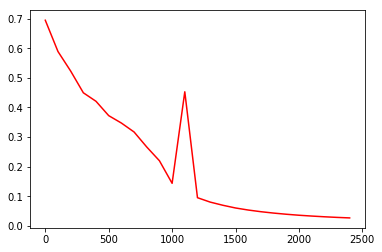

Train Accuracy:  1.0
Test Accuracy:  0.74


In [13]:
# ("L0", {
#         "W": None,
#         "b": None,
#         "z": None,
#         "a": None,
#         "activation": None,
#         "dW": None,
#         "db": None,
#         "n_neuron": 12288}
# ),
map = OrderedDict([
    ("L0", {
        "activation": None,
        "n_neuron": 12288}
    ),
    ("L1", {
        "activation": "relu",
        "n_neuron": 7}
    ),
    ("L2", {
        "activation": "sigmoid",
        "n_neuron": 1}
    )
])
    
model = nn_model(train_x, train_y, map, test_x, test_y, iterations=2500, learning_rate=0.0075)

Loss  0   0.771749328424
Loss  100   0.672053440082
Loss  200   0.648263204858
Loss  300   0.61150688161
Loss  400   0.567047326837
Loss  500   0.540137663455
Loss  600   0.527929956946
Loss  700   0.465477377177
Loss  800   0.369125852496
Loss  900   0.391746974348
Loss  1000   0.31518698886
Loss  1100   0.272699844179
Loss  1200   0.237418534003
Loss  1300   0.199601205322
Loss  1400   0.189263003885
Loss  1500   0.161188546658
Loss  1600   0.148213896624
Loss  1700   0.13777487813
Loss  1800   0.129740175492
Loss  1900   0.12122535068
Loss  2000   0.113820606686
Loss  2100   0.107839285263
Loss  2200   0.102854660694
Loss  2300   0.100897454453
Loss  2400   0.0928782152647


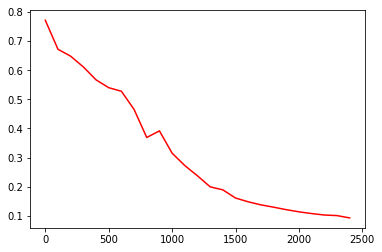

Train Accuracy:  0.985645933014
Test Accuracy:  0.8


In [14]:
map = OrderedDict([
    ("L0", {
        "activation": None,
        "n_neuron": 12288}
    ),
    ("L1", {
        "activation": "relu",
        "n_neuron": 20}
    ),
    ("L2", {
        "activation": "relu",
        "n_neuron": 7}
    ),
    ("L3", {
        "activation": "relu",
        "n_neuron": 5}
    ),
    ("L4", {
        "activation": "sigmoid",
        "n_neuron": 1}
    )
])
    
model = nn_model(train_x, train_y, map, test_x, test_y, iterations=2500, learning_rate=0.0075)

In [15]:
import tensorflow as tf

In [35]:
def initialize_params(layer_dims, seed=1):
    L = len(layer_dims) - 1
    params = {}
    
    for l in range(1, L+1):
        params['W'+str(l)] = tf.Variable(tf.random_normal((layer_dims[l], layer_dims[l-1]), mean=0, stddev=1.0, seed=seed), name='W'+str(l))
        params['W'+str(l)] = params['W'+str(l)] / tf.sqrt(tf.cast(layer_dims[l-1], tf.float32))
        params['b'+str(l)] = tf.Variable(tf.zeros((layer_dims[l] ,1)), name='b'+str(l))

    return params

In [36]:
def forward_propagation(X, params):
    caches = {}
    caches['A0'] = X
    L = int(len(params.keys())/2)
    
    for l in range(1, L):
        caches['Z'+str(l)] = tf.matmul(params['W'+str(l)], caches['A'+str(l-1)], name='Z'+str(l))
        caches['A'+str(l)] = tf.nn.relu(caches['Z'+str(l)], name='A'+str(l))
    
    caches['Z'+str(L)] = tf.matmul(params['W'+str(L)], caches['A'+str(L-1)], name='Z'+str(L))
    caches['A'+str(L)] = tf.nn.sigmoid(caches['Z'+str(L)], name='A'+str(L))
    
    return caches

In [46]:
def predict(y, threshold=0.5):
    
    y[y >= threshold] = 1
    y[y < threshold] = 0

    return y
    

iter:  0    0.707382
iter:  100    0.651004
iter:  200    0.642023
iter:  300    0.627778
iter:  400    0.599844
iter:  500    0.565455
iter:  600    0.534808
iter:  700    0.502847
iter:  800    0.472963
iter:  900    0.450145
iter:  1000    0.429492
iter:  1100    0.422667
iter:  1200    0.405289
iter:  1300    0.394472
iter:  1400    0.371724
iter:  1500    0.352682
iter:  1600    0.329281
iter:  1700    0.317626
iter:  1800    0.297012
iter:  1900    0.273052
iter:  2000    0.243278
iter:  2100    0.220226
iter:  2200    0.202948
iter:  2300    0.180924
iter:  2400    0.154545
Train accuracy:  0.956937799043
Test accuracy:  0.64


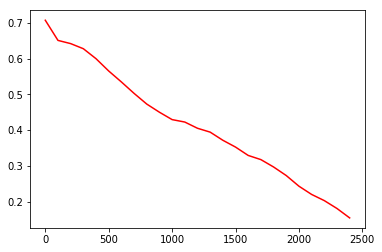

In [48]:
X = tf.placeholder("float", [train_x.shape[0], None])
y = tf.placeholder("float", [train_y.shape[0], None])

layer_dims = [12288, 7, 1]

params = initialize_params(layer_dims)
caches = forward_propagation(X, params)
y_ = caches['A'+str(len(layer_dims)-1)]

loss = tf.reduce_mean(-y*tf.log(y_) - (1-y)*tf.log(1-y_))

train = tf.train.GradientDescentOptimizer(2.0).minimize(loss)

init  = tf.global_variables_initializer()

losses = []

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(2500):
        
        if i % 100 == 0:
            loss_val = sess.run(loss, feed_dict={X: train_x, y: train_y})
            print("iter: ", i, "  ", loss_val)
            losses.append(loss_val)
        
        sess.run(train, feed_dict={X: train_x, y: train_y})
    
    p = predict(sess.run(caches['A2'], feed_dict={X:train_x}))
    accuracy = np.mean(p == train_y)
    print("Train accuracy: ", accuracy)
    
    p = predict(sess.run(caches['A2'], feed_dict={X:test_x}))
    accuracy = np.mean(p == test_y)
    print("Test accuracy: ", accuracy)

index = np.array([np.arange(0, 2500, 100)])
losses = np.array(([losses]))
ploter = Ploter()
ploter.plot(index.T, losses.T, 'r-')
ploter.show() 

In [45]:
with tf.Session() as sess:
    sess.run(init)
    p = predict(sess.run(caches['A2'], feed_dict={X:train_x}))

accuracy = np.mean(p == train_y)

print("accuracy: ", accuracy)

accuracy:  0.377990430622


In [27]:
layer_dims = [12288, 7, 1]

params = initialize_params(layer_dims)

init  = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

print(sess.run(params))

{'W1': array([[-0.00731898,  0.01339271,  0.00058934, ...,  0.00287517,
        -0.00312648,  0.00803385],
       [ 0.00387157,  0.00028956,  0.00107759, ...,  0.01238836,
         0.00813171,  0.00682219],
       [-0.00241446,  0.00655832,  0.00372871, ...,  0.0009098 ,
        -0.00273578, -0.01251011],
       ..., 
       [ 0.00955421, -0.02885374,  0.00867008, ...,  0.0057876 ,
        -0.01557583, -0.00063071],
       [ 0.00733069,  0.00933809, -0.00629758, ...,  0.00514295,
        -0.00017197,  0.00806379],
       [-0.00601984,  0.01417215, -0.01076469, ..., -0.00050384,
        -0.01080272, -0.0013632 ]], dtype=float32), 'b1': array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32), 'W2': array([[-0.30664948,  0.56112558,  0.02469218, -0.92325544,  0.03751237,
         0.22346179,  0.22406603]], dtype=float32), 'b2': array([[ 0.]], dtype=float32)}
